In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output, display, Math, Latex
from atlas_ml import *

In [62]:
# Simple Train/test split seems to cause a high error - Shuffle df for better results
df = pd.read_csv('Datasets/Regression/ex2data1.csv')
A2 = df.values.T
X1 = A2[0:2,0:-10]
X2 = normalize(X1)
Y1 = A2[2:3,0:-10]
Y2 = one_hot(Y1,2)
X1_test = A2[0:2,-10:]
X2_test = normalize(X1_test)
Y1_test = A2[2:3,-10:]
Y2_test = one_hot(Y1_test,2)

In [25]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    if axes == None:
        axes = plt.gca()
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

In [52]:
n_in = np.shape(X2)[0]
n_out = np.shape(Y2)[0]
log_reg = Logistic(n_in,n_out,CE_loss)

In [53]:
n_epochs = 300
lr = 0.01
lr_decay = 1
batch_size = X2.shape[1]
beta = 0

#regularization parameter labmda
reg_lamda = 10

epoch:300/300 | Loss:0.1590 | Train Accuracy: 0.9222 | Test_Accuracy:0.8000


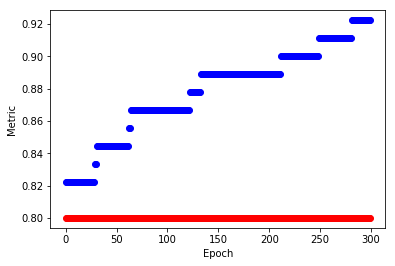

In [54]:
train(log_reg, X2, Y2, X2_test, Y2_test, model_accuracy, n_epochs, batch_size, lr, lr_decay, beta, reg_lamda)

In [65]:
H = log_reg.f_pass(X2)
H2 = inv_one_hot(H)
A3 = np.vstack([X1,H2])

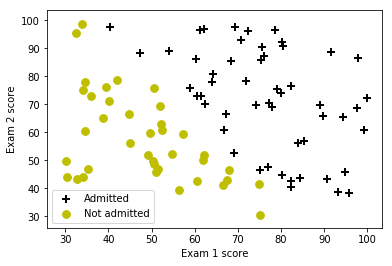

In [66]:
plotData(A3.T, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')


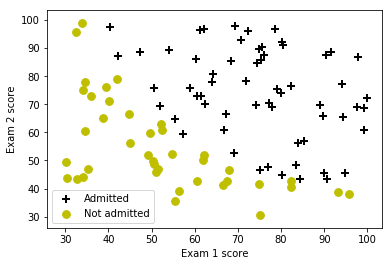

In [57]:
plotData(A2.T, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')